In [1]:
#importing libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [3]:
#loading our data set
data=pd.read_csv("Position_Salaries.csv")
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


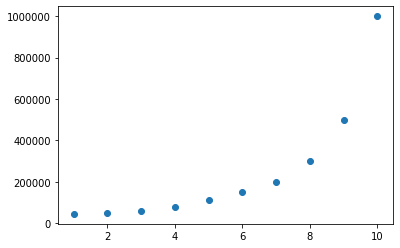

In [4]:
plt.scatter(data["Level"],data["Salary"])

In [5]:
#you can see our data is not linear
#so we perform polynomial regression


In [6]:
#independent and dependant variable
X=data["Level"].values
Y=data["Salary"].values


In [7]:
Poly=PolynomialFeatures(degree=6)
Xpoly=Poly.fit_transform(X.reshape(-1,1))

In [8]:
Xpoly#x**0 x**1 x**2 x**3..... x**n
#here our degree is 6 so our nth term is 6

array([[1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [1.00000e+00, 2.00000e+00, 4.00000e+00, 8.00000e+00, 1.60000e+01,
        3.20000e+01, 6.40000e+01],
       [1.00000e+00, 3.00000e+00, 9.00000e+00, 2.70000e+01, 8.10000e+01,
        2.43000e+02, 7.29000e+02],
       [1.00000e+00, 4.00000e+00, 1.60000e+01, 6.40000e+01, 2.56000e+02,
        1.02400e+03, 4.09600e+03],
       [1.00000e+00, 5.00000e+00, 2.50000e+01, 1.25000e+02, 6.25000e+02,
        3.12500e+03, 1.56250e+04],
       [1.00000e+00, 6.00000e+00, 3.60000e+01, 2.16000e+02, 1.29600e+03,
        7.77600e+03, 4.66560e+04],
       [1.00000e+00, 7.00000e+00, 4.90000e+01, 3.43000e+02, 2.40100e+03,
        1.68070e+04, 1.17649e+05],
       [1.00000e+00, 8.00000e+00, 6.40000e+01, 5.12000e+02, 4.09600e+03,
        3.27680e+04, 2.62144e+05],
       [1.00000e+00, 9.00000e+00, 8.10000e+01, 7.29000e+02, 6.56100e+03,
        5.90490e+04, 5.31441e+05],
       [1.00000e+00, 1.00000

In [9]:
#initializing our regressor
reg=LinearRegression()
reg.fit(Xpoly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

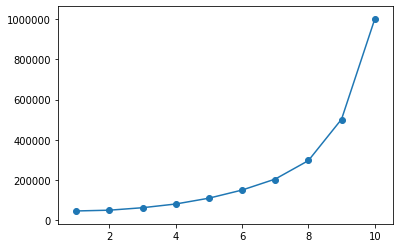

In [10]:
plt.plot(X,reg.predict(Xpoly))
plt.scatter(X,Y)

In [11]:
ypredict=reg.predict(Xpoly)
ypredict

array([ 45190.55943813,  49086.82983497,  61383.44988351,  79877.62237762,
       108808.85780803, 149282.05128119, 203940.55944048, 295889.27738951,
       501867.71561782, 999673.07692873])

In [12]:
Y #you can see our predicted and actual are closer 

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [13]:
def root_mean_square_error(ytest,ypredict):
    return np.sqrt(np.sum((ytest-ypredict)**2))


In [15]:
print(root_mean_square_error(Y,ypredict))


6383.93781334683
